<a href="https://colab.research.google.com/github/VarunSUK/ml-scd-detection/blob/main/EDA_Sickle_Cell_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Exploratory Data Analysis (EDA): Sickle Cell Image Dataset

### 📘 Notebook: `01_EDA_Sickle_Cell_Image_Analysis.ipynb`

---

## 📌 Objective

The goal of this notebook is to explore and understand the structure and characteristics of the **sickle cell image dataset**. This analysis will help guide preprocessing, model design, and training strategy.

---

## 📂 Dataset Structure

The dataset is organized into two main categories: **Positive** and **Negative** samples.

```
Data/
├── Positive/
│   ├── Labelled/       # SCD-positive images with bounding boxes
│   └── Unlabelled/     # SCD-positive images without annotations
└── Negative/
    └── Clear/          # Healthy blood smear images
```

---

## 📊 What We'll Do

- Count the number of images per class
- Visualize random samples from each folder
- Inspect image resolutions and aspect ratios
- Identify any data imbalance or quality issues

---

## 📈 Class Distribution

We'll visualize the number of images in each category to understand if the dataset is balanced or skewed.

---

## 🖼️ Sample Visualizations

We will randomly display a few images from each class:
- **Positive – Labelled**
- **Positive – Unlabelled**
- **Negative – Clear**

This helps us:
- Confirm the image content is valid
- Identify visible staining/bounding box differences
- Prepare for data augmentation strategies

---

## 📐 Image Dimensions

We will collect and review the dimensions (width x height) of all images to determine if resizing or padding is necessary before feeding them into a neural network.

---

## ✅ Summary

This EDA will help guide:
- **Input size** selection (e.g., 224x224)
- **Augmentation techniques**
- **Preprocessing pipeline**
- **Class balancing strategies**

---


Positive - Labelled: 422 images
Positive - Unlabelled: 422 images
Negative - Clear: 147 images


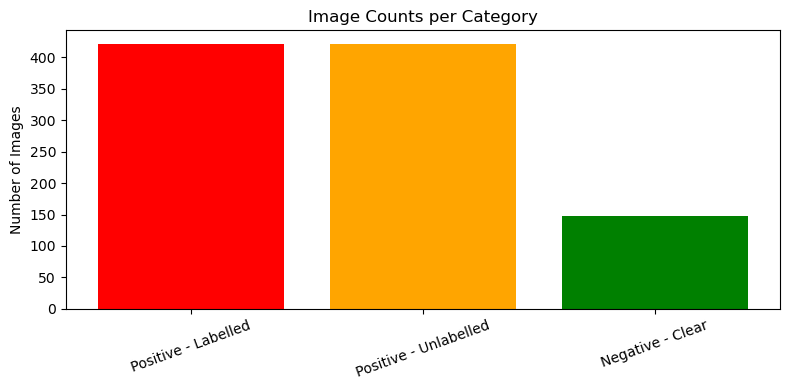

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Paths
base_path = 'Data'
positive_labelled = os.path.join(base_path, 'Positive/Labelled')
positive_unlabelled = os.path.join(base_path, 'Positive/Unlabelled')
negative_clear = os.path.join(base_path, 'Negative/Clear')

# Count images
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

counts = {
    "Positive - Labelled": count_images(positive_labelled),
    "Positive - Unlabelled": count_images(positive_unlabelled),
    "Negative - Clear": count_images(negative_clear)
}

# Print counts
for k, v in counts.items():
    print(f"{k}: {v} images")

# Plot bar chart
plt.figure(figsize=(8, 4))
plt.bar(counts.keys(), counts.values(), color=['red', 'orange', 'green'])
plt.title("Image Counts per Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


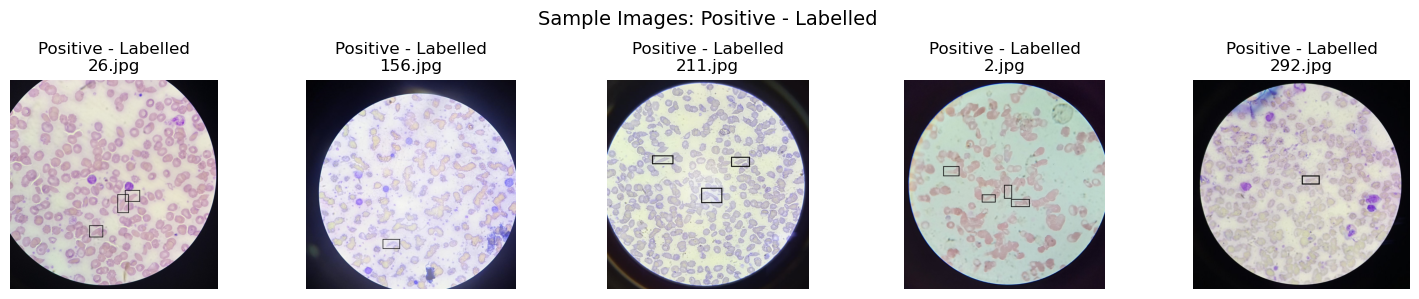

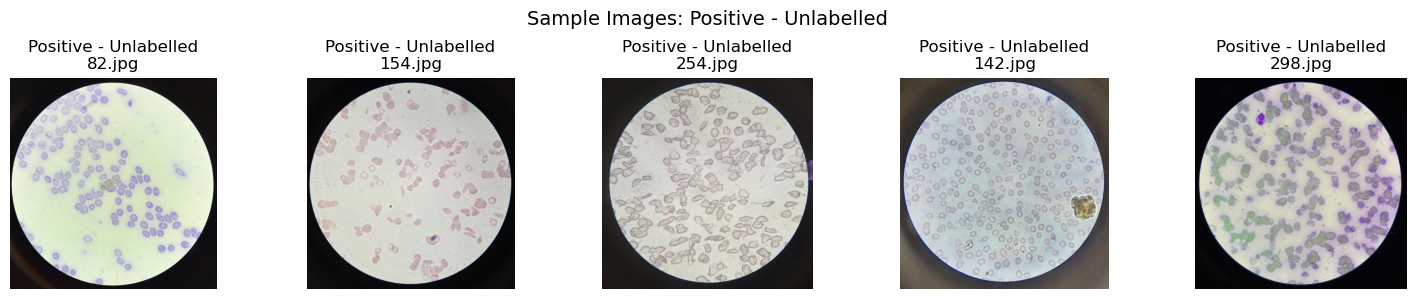

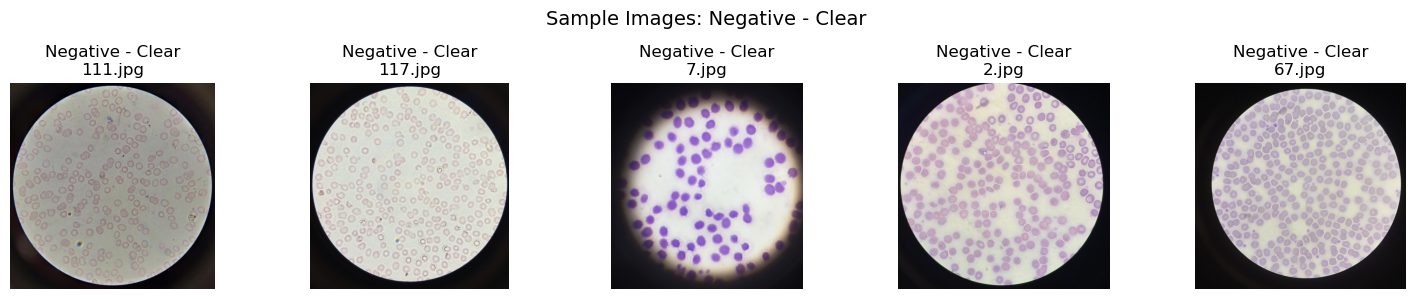

In [ ]:
def show_random_images(folder, title, n=5):
    images = random.sample(os.listdir(folder), n)
    plt.figure(figsize=(15, 3))
    for i, img in enumerate(images):
        img_path = os.path.join(folder, img)
        img_data = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img_data)
        plt.axis('off')
        plt.title(f"{title}\n{img}")
    plt.suptitle(f"Sample Images: {title}", fontsize=14)
    plt.tight_layout()
    plt.show()

show_random_images(positive_labelled, "Positive - Labelled")
show_random_images(positive_unlabelled, "Positive - Unlabelled")
show_random_images(negative_clear, "Negative - Clear")


In [ ]:
z